<a href="https://colab.research.google.com/github/withopenWaigua/draw_picture/blob/main/%E6%95%B0%E6%8D%AE%E5%85%B3%E7%B3%BB%E5%9E%8B%E5%9B%BE%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 散点图系列

In [ ]:
pip install scikit-misc

     |████████████████████████████████| 8.8 MB 3.7 MB/s 


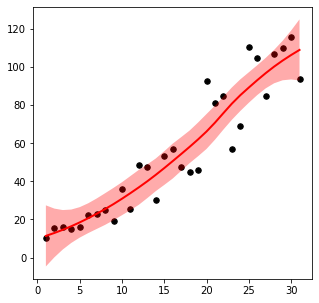

 
3.52 x - 1.107


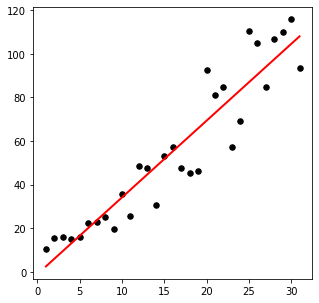

In [ ]:

import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
from plotnine import *

from skmisc.loess import loess #提供loess smoothing
df=pd.read_csv('Scatter_Data.csv')


#---------------------------图(f) loess数据平滑曲线-----------------------------
l = loess(df['x'], df['y'])
l.fit()
pred = l.predict(df['x'], stderror=True)
conf = pred.confidence()

y_fit = pred.values
ll = conf.lower
ul = conf.upper

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],s=30,c='black')
plt.plot(df['x'], y_fit, color='r',linewidth=2,label='polyfit values')
plt.fill_between(df['x'],ll,ul, facecolor='r', edgecolor='none',interpolate=True,alpha=.33)
plt.show()

#-----------------------------图(b): 线性拟合曲线--------------------------------
fun = np.polyfit(df['x'], df['y'], 1)
poly= np.poly1d(fun)
print(poly)           #打印出拟合函数
y_fit =poly(df['x'])  #拟合y值


fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],s=30,c='black')
plt.plot(df['x'], y_fit, color='r',linewidth=2,label='polyfit values')





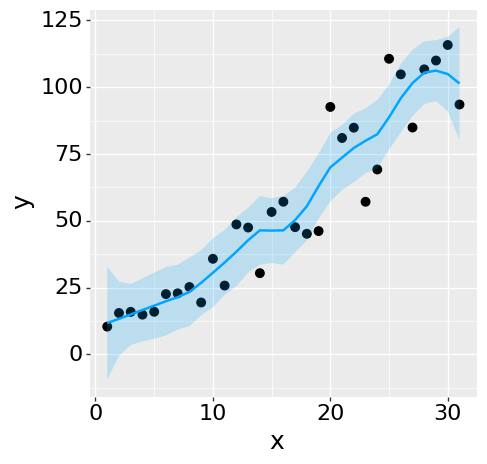

<ggplot: (8741540235497)>


In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import skmisc #提供loess smoothing
df=pd.read_csv('Scatter_Data.csv')
plot_loess=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
      axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
     legend_position="none",
     aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)

print(plot_loess)

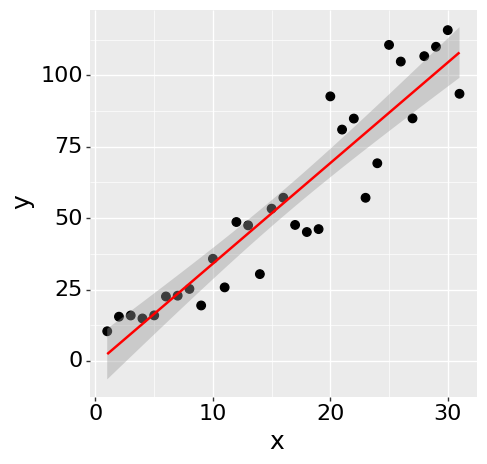

<ggplot: (8741535105213)>


In [ ]:
plot_lm=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method="lm",se=True,colour="red")+ #(h)
  #geom_smooth(method = 'gam',formula='y ~s(x)')+   #(g)
  #geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
      axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
     legend_position="none",
     aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)

print(plot_lm)

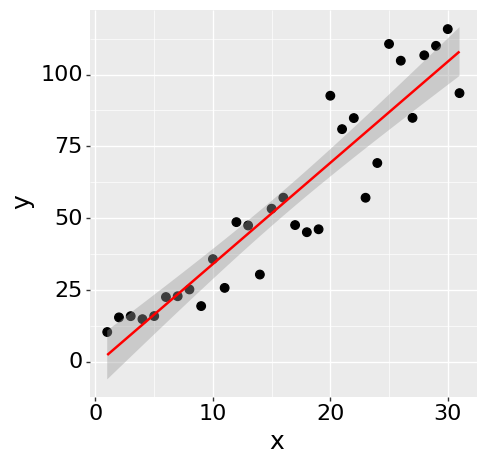

<ggplot: (8741535105089)>


In [ ]:
plot_glm=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method="glm",se=True,colour="red")+ #(h)
  #geom_smooth(method = 'gam')+   #(g)
  #geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
      axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
     legend_position="none",
     aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)

print(plot_glm)


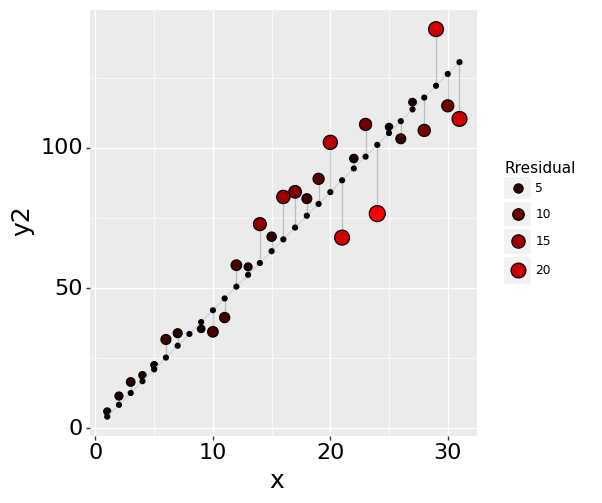

<ggplot: (8741535190277)>


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 30 10:28:18 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

df=pd.read_csv('Residual_Analysis_Data.csv')

#-----------------------------------(a) 线性回归----------------------------------------
results = sm.OLS(df.y2, df.x).fit()

df['predicted']=results.predict()   # 保存预测值
df['residuals']=df.predicted-df.y2   #保存残差(有正有负)
df['Abs_Residuals']=np.abs(df.residuals)  #保存残差的绝对值
#mydata包含x、y2、predicted、residuals、Abs_Residuals 共5列数值
base_Residuals=(ggplot(df, aes(x = 'x', y = 'y2')) +
  geom_point(aes(fill ='Abs_Residuals', size = 'Abs_Residuals'),shape='o',colour="black") +
# 使用实际值绘制气泡图，并将气泡的颜色和面积映射到残差的绝对值Abs_Residuals
  geom_line(aes(y = 'predicted'), color = "lightgrey") + #添加空心圆圈的预测值
  geom_point(aes(y = 'predicted'), shape = 'o') + #添加空心圆圈的预测值
  geom_segment(aes(xend = 'x', yend = 'predicted'), alpha = .2) +#添加实际值和预测值的连接线...
  
  scale_fill_gradientn(colors = ["black", "red"]) + #填充颜色映射到red单色渐变系
  
  guides(fill = guide_legend(title="Rresidual"),
         size = guide_legend(title="Rresidual"))+      
  theme(
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       #legend_position="none",
       aspect_ratio =1.1,
       figure_size = (5, 5),
       dpi = 100)
)
print(base_Residuals)



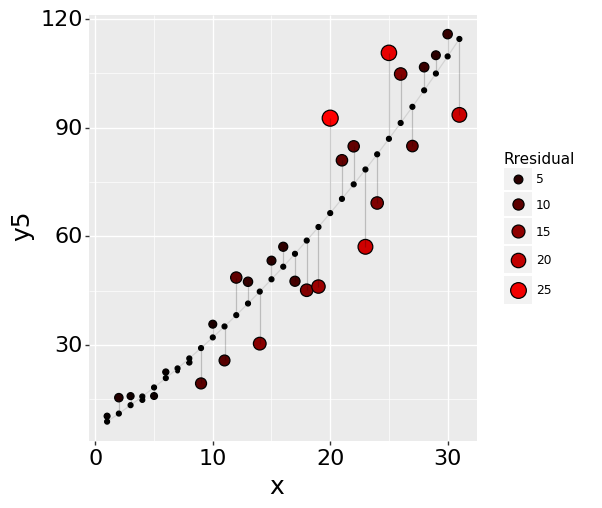

<ggplot: (8741532745505)>


In [ ]:
#---------------------------------------(b)二次回归------------------------------------------
X = np.column_stack((df.x, df.x**2))
#使用 sm.add_constant() 在 array 上加入一列常项 1。
X = sm.add_constant(X)
results = sm.OLS(df.y5, X).fit()

df['predicted']=results.predict()   # 保存预测值
df['residuals']=df.predicted-df.y5   #保存残差(有正有负)
df['Abs_Residuals']=np.abs(df.residuals)  #保存残差的绝对值
#mydata包含x、y2、predicted、residuals、Abs_Residuals 共5列数值
base_Residuals=(ggplot(df, aes(x = 'x', y = 'y5')) +
  geom_point(aes(fill ='Abs_Residuals', size = 'Abs_Residuals'),shape='o',colour="black") +
# 使用实际值绘制气泡图，并将气泡的颜色和面积映射到残差的绝对值Abs_Residuals
  #geom_smooth(method = "lm", se = False, color = "lightgrey") + # 添加灰色的线性拟合曲线
  geom_line(aes(y = 'predicted'), color = "lightgrey") + #添加空心圆圈的预测值
  geom_point(aes(y = 'predicted'), shape = 'o') + #添加空心圆圈的预测值
  geom_segment(aes(xend = 'x', yend = 'predicted'), alpha = .2) +#添加实际值和预测值的连接线...
  
  scale_fill_gradientn(colors = ["black", "red"]) + #填充颜色映射到red单色渐变系
  
  guides(fill = guide_legend(title="Rresidual"),
         size = guide_legend(title="Rresidual"))+      
  theme(
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       #legend_position="none",
       aspect_ratio =1.1,
       figure_size = (5, 5),
       dpi = 100)
)
print(base_Residuals)

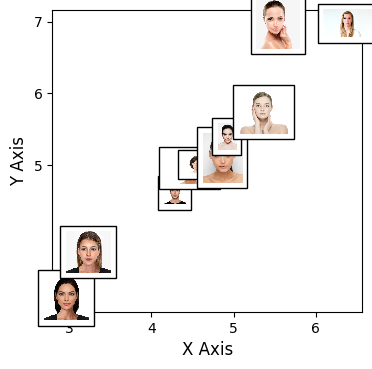

In [ ]:
# 图片类型散点图
# 二特征，但显示要相反 =4

# -*- coding: utf-8 -*-
"""
Created on Fri Mar  1 16:25:02 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

def getImage(path,zoom=0.07):
    img = Image.open(path)
    img.thumbnail((512, 512), Image.ANTIALIAS) # resizes image in-place
    return OffsetImage(img,zoom=zoom)

paths =np.arange(1,11,1)

N=10
x = np.sort(np.random.randn(N))+5
y = np.sort(np.random.randn(N))+5
 
fig, ax = plt.subplots(figsize=(4,4),dpi =100)
ax.scatter(x, y) 

plt.xlabel("X Axis",fontsize=12)
plt.ylabel("Y Axis",fontsize=12)
plt.yticks(ticks=np.arange(5,8,1))

artists = []
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage('图片散点图数据集/'+str(path)+'.jpg'), (x0, y0), frameon=True)
    artists.append(ax.add_artist(ab))
    
#fig.savefig("图片散点图.pdf")


检验是否符合正态分布

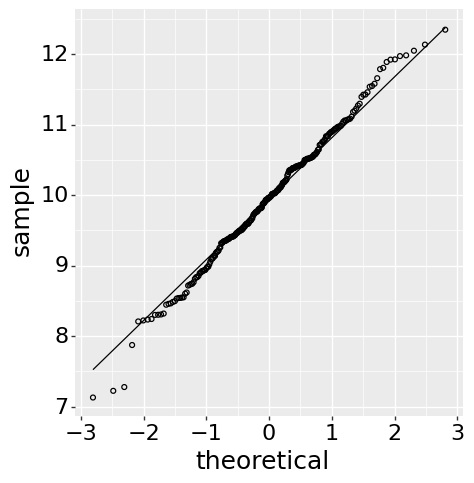

<ggplot: (8741535047105)>


In [ ]:
## QQ图
import numpy as np
import pandas as pd
from plotnine import *
df=pd.DataFrame(dict(x=np.random.normal(loc=10,scale=1,size=250)))
base_plot=(ggplot(df, aes(sample = 'x'))+
  geom_qq(shape='o',fill="none")+
  geom_qq_line()+
   theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.05,
       figure_size = (5,5),
       dpi = 100
       )
  )
print(base_plot)

# 聚类分类图

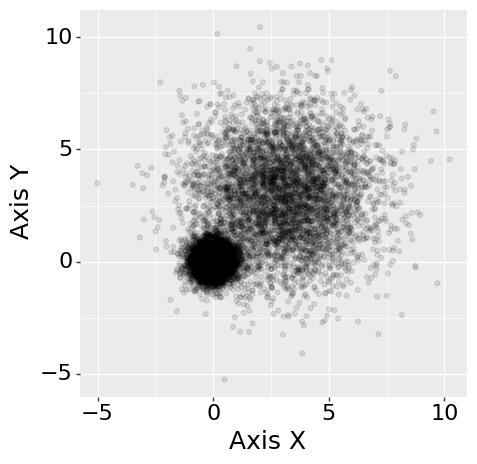

<ggplot: (8741535251041)>


In [ ]:
import pandas as pd
from plotnine import *
from sklearn.cluster import KMeans

df=pd.read_csv('HighDensity_Scatter_Data.csv')

#--------------------------------------(b) 带透明度设置的散点图------------------------------------
base_plot1=(ggplot(df, aes('x','y')) +
  geom_point( colour="black",alpha=0.1)+
  labs(x = "Axis X",y="Axis Y")+
 theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)
print(base_plot1)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


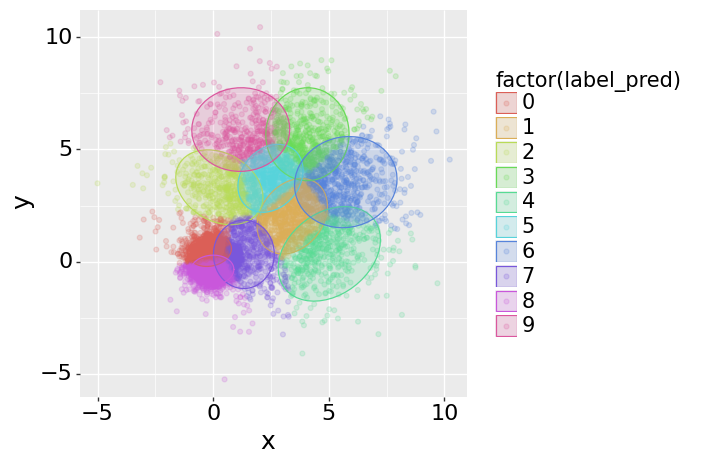

<ggplot: (8741527116505)>


In [ ]:
estimator = KMeans(n_clusters=10)#构造聚类器
estimator.fit(df)#聚类
df['label_pred'] = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和


# mydata为x和y两列数据组成，kmeans聚类算法
#将分类结果转变成类别变量(categorical variables)
base_plot2=(ggplot(df, aes('x','y',color='factor(label_pred)')) +
   geom_point (alpha=0.2)+
  # 绘制透明度为0.2 的散点图
  stat_ellipse(aes(x='x',y='y',fill= 'factor(label_pred)'), geom="polygon", level=0.95, alpha=0.2) 
  #绘制椭圆标定不同类别，如果省略该语句，则绘制图3-1-7(c)
  # scale_color_manual(values=("#00AFBB","#FC4E07")) +#使用不同颜色标定不同数据类别
  # scale_fill_manual(values=("#00AFBB","#FC4E07"))+  #使用不同颜色标定不同椭类别
  +theme(
       text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5,5),
       dpi = 100
       )
)
print(base_plot2)

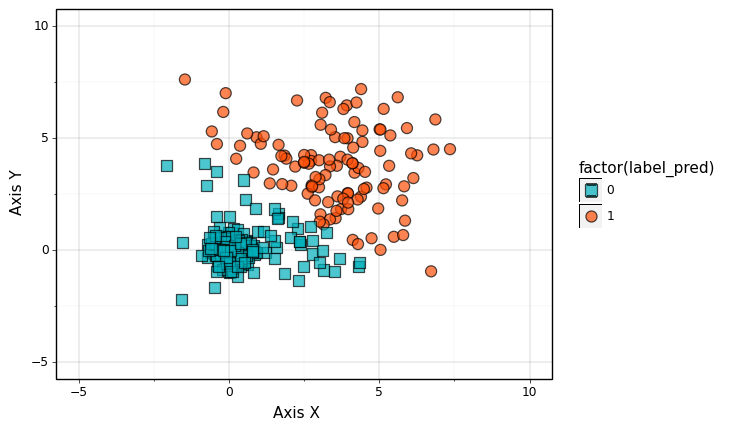

<ggplot: (8741535118193)>


In [ ]:
import pandas as pd
from plotnine import *

df=pd.read_csv('MultiSeries_Scatter_Data.csv')

base_plot=(ggplot(df, aes('x','y',shape='factor(label_pred)',fill='factor(label_pred)')) +
     geom_point(size=4,colour="black",alpha=0.7)+
  scale_shape_manual(values=('s','o'))+
  scale_fill_manual(values=("#00AFBB",  "#FC4E07"))+
  labs(x = "Axis X",y="Axis Y")+
  scale_y_continuous(limits =(-5, 10))+
  scale_x_continuous(limits = (-5, 10))+
  theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5,5),
       dpi = 100
       )
  +theme_linedraw()
)
print(base_plot)


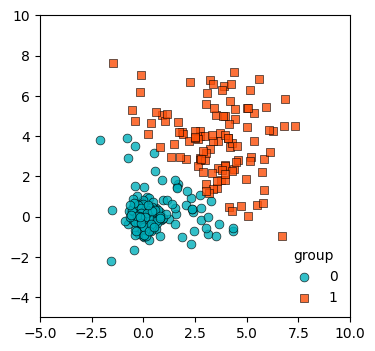

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
df=pd.read_csv('MultiSeries_Scatter_Data.csv')
group=np.unique(df.label_pred)
markers=['o','s']  
colors=["#00AFBB",  "#FC4E07"]
fig =plt.figure(figsize=(4,4), dpi=100)
for i in range(0,len(group)):
    temp_df=df[df.label_pred==group[i]]
    plt.scatter(temp_df.x, temp_df.y,
                s=40, linewidths=0.5, edgecolors="k",alpha=0.8,
                marker=markers[i], c=colors[i],label=group[i])
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend(title='group',loc='lower right',edgecolor='none',facecolor='none')
plt.show()

# 气泡图
面积的大小代表第三个维度的数据
- 虽然可以最多代表4个维度数据，面积和颜色各代表一个，但为了简洁，推荐最多代表3个

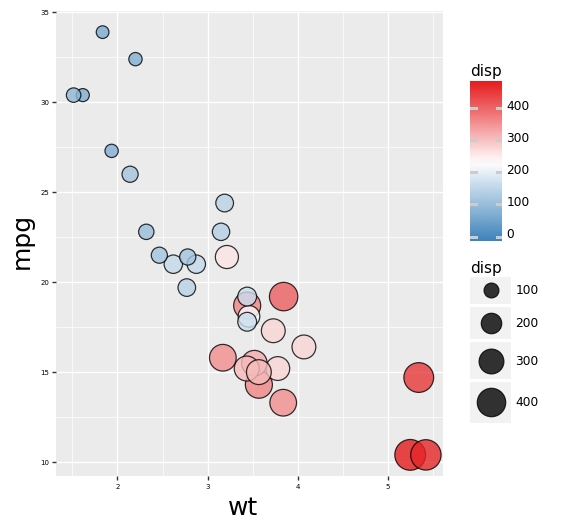

<ggplot: (8741526175585)>


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  1 17:17:16 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars

#---------------------------------(c) 带数据标签的气泡图 -------------------------------
base_plot=(ggplot(mtcars, aes(x='wt',y='mpg'))+
   geom_point(aes(size='disp',fill='disp'),shape='o',colour="black",alpha=0.8)+ 
# 绘制气泡图，颜色填充和面积大小都映射到“disp”
   scale_fill_gradient2(low="#377EB8",high="#E41A1C",
                        limits = (0,np.max(mtcars.disp)), 
                        midpoint = np.mean(mtcars.disp))+ #设置填充颜色映射主题(Colormap)
  scale_size_area(max_size=12)+ # 设置显示的气泡图气泡最大面积
  # geom_text(label = mtcars.disp,nudge_x =0.3,nudge_y =0.3)+ # 添加数据标签disp”
  theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=5,face="plain",color="black"),
       aspect_ratio =1.2,
       figure_size = (5,5),
       dpi = 100
       )
  )
print(base_plot)



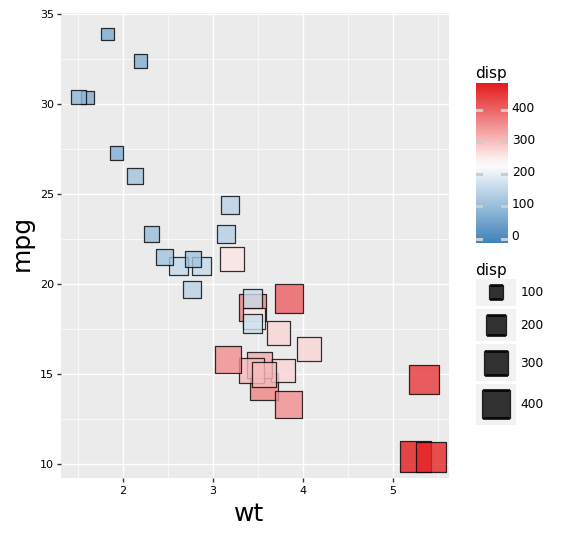

<ggplot: (8741526181161)>


In [ ]:
#---------------------------- (d) 方块状的气泡图--------------------------------------
base_plot=(ggplot(mtcars, aes(x='wt',y='mpg'))+
   geom_point(aes(size='disp',fill='disp'),shape='s',colour="black",alpha=0.8)+ 
# 绘制气泡图，颜色填充和面积大小都映射到“disp”
   scale_fill_gradient2(low="#377EB8",high="#E41A1C",
                        limits = (0,np.max(mtcars.disp)), 
                        midpoint = np.mean(mtcars.disp))+ #设置填充颜色映射主题(Colormap)
  scale_size_area(max_size=12)+ # 设置显示的气泡图气泡最大面积
  #geom_text(label = mtcars.disp,nudge_x =0.3,nudge_y =0.3)+ # 添加数据标签disp”
  theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=8,face="plain",color="black"),
       aspect_ratio =1.2,
       figure_size = (5,5),
       dpi = 100
       )
  )
print(base_plot)

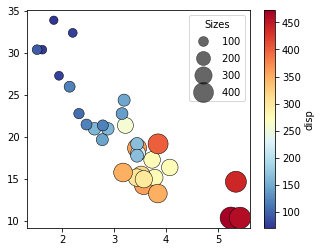

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  2 14:28:41 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

from plotnine.data import mtcars
import matplotlib.pyplot as plt

x=mtcars['wt']
y=mtcars['mpg']
size=mtcars['disp']
fill=mtcars['disp']

fig, ax = plt.subplots(figsize=(5,4))
scatter = ax.scatter(x, y, c=fill, s=size, linewidths=0.5, edgecolors="k",cmap='RdYlBu_r')


cbar = plt.colorbar(scatter)
cbar.set_label('disp')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6,num=5 )
ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

# 三维散点图

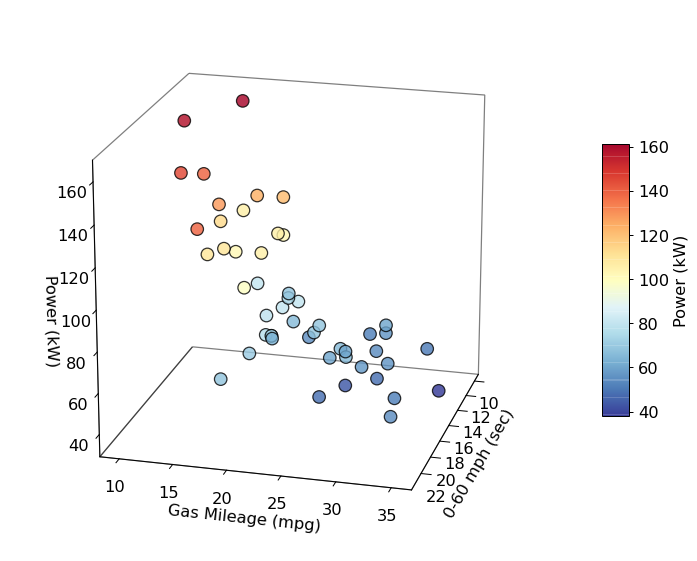

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 18 11:21:27 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
#https://dawes.wordpress.com/2014/06/27/publication-ready-3d-figures-from-matplotlib/
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',size=13)

df=pd.read_csv('ThreeD_Scatter_Data.csv')

fig = plt.figure(figsize=(10,8),dpi =90)  
#ax =  fig.add_subplot(1, 1, 1,projection='3d')
ax = fig.gca(projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=15, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#--------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
# =============================================================================

p=ax.scatter3D(df.mph, df.Gas_Mileage, df.Power,c=df.Power,s=100,
             cmap='RdYlBu_r',edgecolor='k',alpha=0.8)

ax.set_xlabel('0-60 mph (sec)')
ax.set_ylabel('Gas Mileage (mpg)')
ax.set_zlabel('Power (kW)')

cbar=fig.colorbar(p, shrink=0.5,aspect=10)
cbar.set_label('Power (kW)')

plt.show()

#fig.savefig('三维散点图1.pdf')

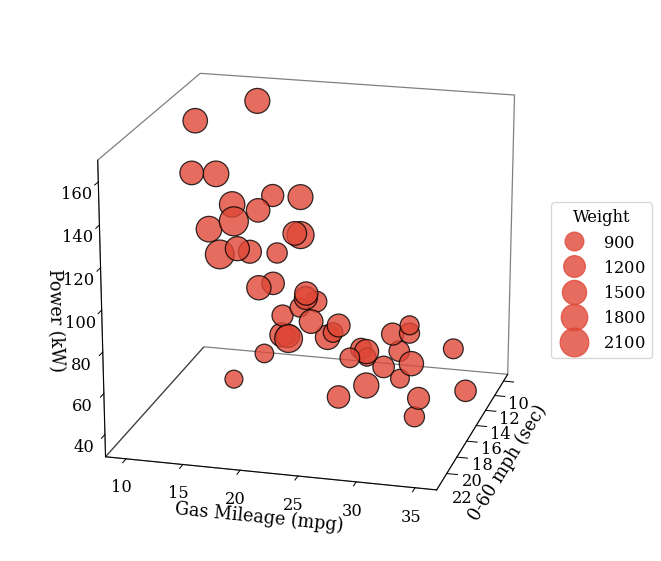

In [ ]:
# 四维散点图
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 18 11:21:27 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
#https://dawes.wordpress.com/2014/06/27/publication-ready-3d-figures-from-matplotlib/
import pandas as pd
from mpl_toolkits import mplot3d
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=13)
mpl.rc('font',family='serif')
mpl.rc('axes',labelsize=14)


df=pd.read_csv('ThreeD_Scatter_Data.csv')

fig = plt.figure(figsize=(8.5,8),dpi =90)  
ax =  fig.add_subplot(1, 1, 1,projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=15, elev=20)

#--------------------------------------------------------------------------------------
ax.grid(False)
# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

# =============================================================================
ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
#--------------------------------------------------------------------------------------

scatter=ax.scatter3D(df.mph, df.Gas_Mileage, df.Power,c='#DF4736',s=df.Weight*0.25, 
             cmap='RdYlBu_r',edgecolor='k',alpha=0.8)

ax.set_xlabel('0-60 mph (sec)')
ax.set_ylabel('Gas Mileage (mpg)')
ax.set_zlabel('Power (kW)')


kw = dict(prop="sizes", num=5,c='#DF4736', func=lambda s: s/0.25)
ax.legend(*scatter.legend_elements(**kw),
                    loc="center",bbox_to_anchor=(1.0, 0, 0, 1), title="Weight")

plt.show()

#fig.savefig('三维气泡图4.pdf')


No handles with labels found to put in legend.


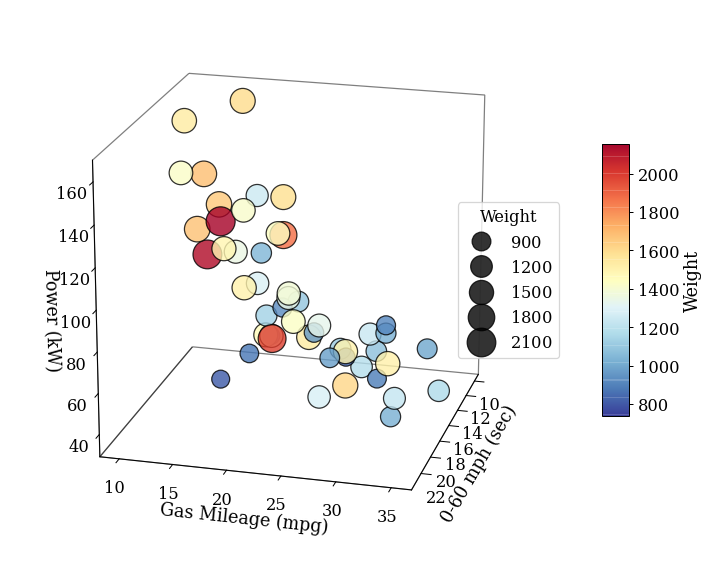

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 18 11:21:27 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df=pd.read_csv('ThreeD_Scatter_Data.csv')

fig = plt.figure(figsize=(10,8),dpi =90)  
ax = fig.gca(projection='3d')
ax.view_init(azim=15, elev=20)
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4

scatter=ax.scatter3D(df.mph, df.Gas_Mileage, df.Power,c=df.Weight,s=df.Weight*0.25, cmap='RdYlBu_r',edgecolor='k',alpha=0.8)
ax.set_xlabel('0-60 mph (sec)')
ax.set_ylabel('Gas Mileage (mpg)')
ax.set_zlabel('Power (kW)')

ax.legend(loc='center right')
cbar=fig.colorbar(scatter, shrink=0.5,aspect=10)
cbar.set_label('Weight')

kw = dict(prop="sizes", num=5, func=lambda s: s/0.25)
legend2 = ax.legend(*scatter.legend_elements(**kw), loc="center right", title="Weight")
plt.show()


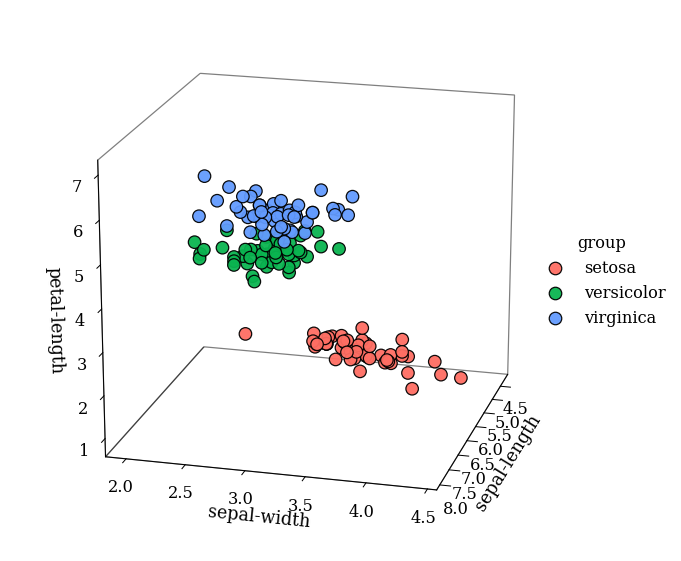

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 18 11:21:27 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
#https://dawes.wordpress.com/2014/06/27/publication-ready-3d-figures-from-matplotlib/
  

import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm,colors
mpl.rc('font',size=13)
#mpl.rc('font',family='serif')
#mpl.rc('axes',labelsize=14)

#plt.rcParams['grid.color'] = "w"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv("iris.data", names=names) #读取csv数据


fig = plt.figure(figsize=(8.5,8),dpi =90)  
ax =  fig.add_subplot(111,projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=15, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#--------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
# =============================================================================
group=np.unique(df['class'])
label=[x.split("-")[1] for x in group]
color = sns.husl_palette(len(group),h=15/360, l=.65, s=1).as_hex() 

for i in range(len(group)):
    df_temp=df[df['class']==group[i]]
    ax.scatter3D(df_temp['sepal-length'], df_temp['sepal-width'], df_temp['petal-length'],c=color[i],
                 s=100,edgecolor='k',alpha=0.95,label=label[i])

ax.set_xlabel('sepal-length')
ax.set_ylabel('sepal-width')
ax.set_zlabel('petal-length')

plt.legend(title='group',loc="center",bbox_to_anchor=(1.0, 0, 0, 1),edgecolor='none',facecolor='none')
plt.show()

#fig.savefig('三维散点图3.pdf')

# 曲面拟合

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           2.44e-70
Time:                        16:45:51   Log-Likelihood:                -1454.1
No. Observations:                 340   AIC:                             2914.
Df Residuals:                     337   BIC:                             2926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.2697      5.318     30.888      0.0

<a list of 10 text.Text objects>

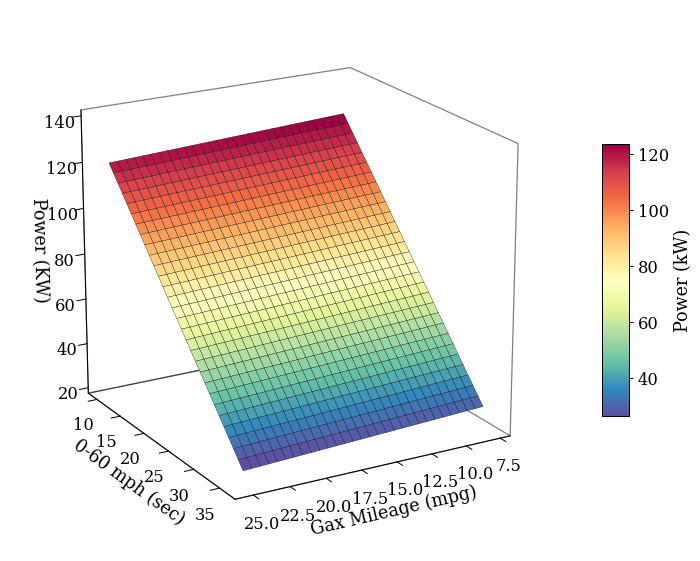

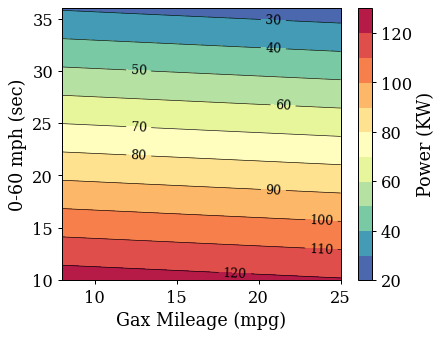

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct  3 11:15:14 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

from statsmodels.formula.api import ols
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
df=pd.read_csv('Surface_Data.csv')
##多项式拟合z=f(x, y)=a+bx+cy+dx2+ey2

formula = 'z~x+y'
est = ols(formula,data=df).fit()
print(est.summary())

N=30
xmar= np.linspace(min(df.x),max(df.x),N)
ymar= np.linspace(min(df.y),max(df.y),N)
X,Y=np.meshgrid(xmar,ymar)
df_grid =pd.DataFrame({'x':X.flatten(),'y':Y.flatten()})

Z=est.predict(df_grid)

fig = plt.figure(figsize=(10,8),dpi =90)  
ax = fig.gca(projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=60, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#--------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

p=ax.plot_surface(X,Y, Z.values.reshape(N,N), rstride=1, cstride=1, cmap='Spectral_r',
                  alpha=1,edgecolor='k',linewidth=0.25)

ax.set_xlabel( "Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")
ax.set_zlabel("Power (KW)")
ax.set_zlim(20,140)


cbar=fig.colorbar(p, shrink=0.5,aspect=10)
cbar.set_label('Power (kW)')
#fig.savefig('三维曲面图3.pdf')


#-------------------------等高线图---------------------------------------------------

fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

CS=ax.contour(X,Y, Z.values.reshape(N,N), levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(X,Y, Z.values.reshape(N,N), levels=10, cmap="Spectral_r")
#scat=ax.scatter(df.x, df.y,c=df.z,s=40, linewidths=0.5, edgecolors="k",alpha=0.8)
ax.set_xlabel( "Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")

fig.colorbar(cntr,ax=ax,label="Power (KW)")                
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)



                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     195.9
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           2.28e-86
Time:                        16:45:57   Log-Likelihood:                -1410.8
No. Observations:                 340   AIC:                             2832.
Df Residuals:                     335   BIC:                             2851.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      290.7007     18.804     15.460   

<a list of 12 text.Text objects>

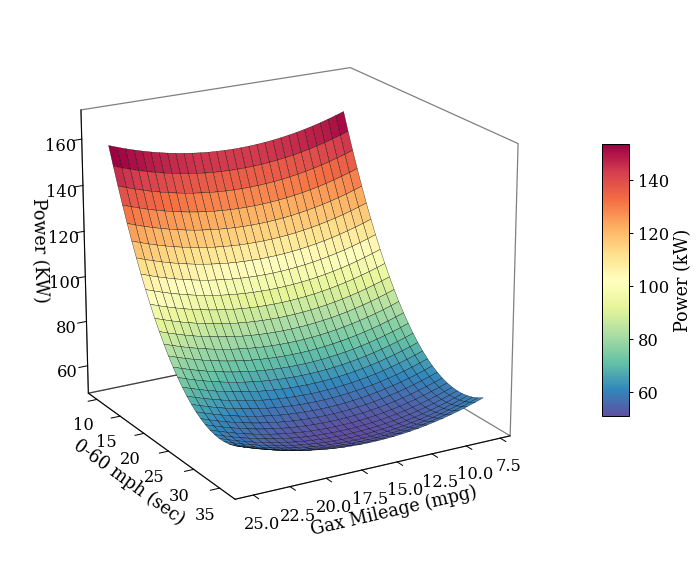

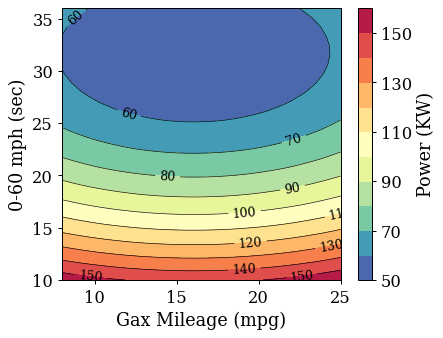

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct  3 11:15:14 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Surface_Data.csv')
##多项式拟合z=f(x, y)=a+bx+cy+dx2+ey2

formula = 'z~x+np.square(x)+y+np.square(y)'
est = ols(formula,data=df).fit()
print(est.summary())

N=30
xmar= np.linspace(min(df.x),max(df.x),N)
ymar= np.linspace(min(df.y),max(df.y),N)
X,Y=np.meshgrid(xmar,ymar)
df_grid =pd.DataFrame({'x':X.flatten(),'y':Y.flatten()})

Z=est.predict(df_grid)

fig = plt.figure(figsize=(10,8),dpi =90)  
ax = fig.gca(projection='3d')
#ax =  fig.add_subplot(projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=60, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴

ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

p=ax.plot_surface(X,Y, Z.values.reshape(N,N), rstride=1, cstride=1, cmap='Spectral_r',
                  alpha=1,edgecolor='k',linewidth=0.25)

ax.set_xlabel( "Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")
ax.set_zlabel("Power (KW)")
ax.set_zlim(50,170)


cbar=fig.colorbar(p, shrink=0.5,aspect=10)
cbar.set_label('Power (kW)')
#fig.savefig('三维曲面图2.pdf')


#-------------------------等高线图---------------------------------------------------

fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

CS=ax.contour(X,Y, Z.values.reshape(N,N), levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(X,Y, Z.values.reshape(N,N), levels=10, cmap="Spectral_r")
#scat=ax.scatter(df.x, df.y,c=df.z,s=40, linewidths=0.5, edgecolors="k",alpha=0.8)
ax.set_xlabel( "Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")

fig.colorbar(cntr,ax=ax,label="Power (KW)")                
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)


- 等高线图
- 用于表示三维数据，z代表具体的值

<a list of 11 text.Text objects>

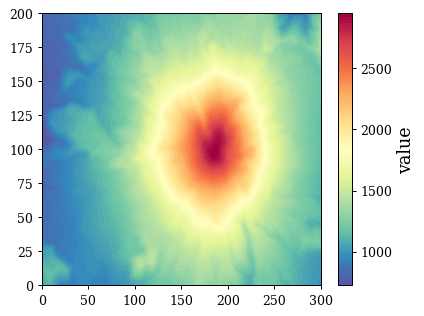

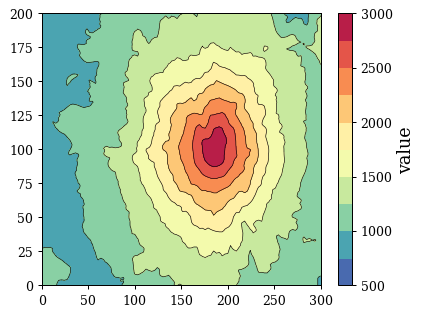

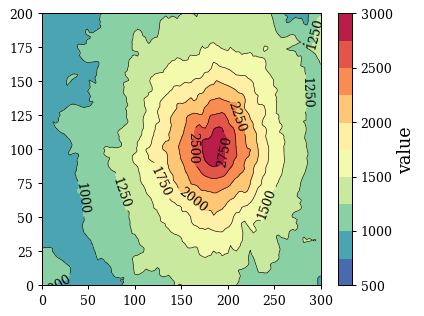

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  1 17:24:59 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib.pyplot import figure, show, rc

mpl.rc('font',size=10)

df=pd.DataFrame(np.loadtxt('等高线.txt'))
df=df.reset_index()
map_df=pd.melt(df,id_vars='index',var_name='var',value_name='value')
map_df['var']=map_df['var'].astype(int)

ngridx = 100
ngridy = 200

xi = np.linspace(0, 300, ngridx)
yi = np.linspace(0, 200, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(map_df['index'], map_df['var'])
interpolator = tri.LinearTriInterpolator(triang, map_df['value'])
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

#-------------------------------------(a)热力分布图 --------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

ax.contour(xi, yi, zi, levels=100, linewidths=0.5, colors='none')
cntr = ax.contourf(xi, yi, zi, levels=100, cmap="Spectral_r")

cbar=fig.colorbar(cntr,ax=ax,label="value")
cbar.set_ticks(np.arange(500,3500,500))
#fig.savefig('等高线图1.pdf')

#------------------------------------(b) 等高线图----------------------------------------------
# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

ax.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=10, cmap="Spectral_r")

fig.colorbar(cntr,ax=ax,label="value")
#plt.plot(x, y, 'ko', ms=3)
#ax.axis((-2, 2, -2, 2))
#ax.set_title('' %(npts, ngridx * ngridy))
#fig.savefig('等高线图2.pdf') 
#------------------------------------(c) 带标签的等高线图-----------------------------------------------
fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

CS=ax.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=10, cmap="Spectral_r")
fig.colorbar(cntr,ax=ax,label="value")                
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)
#fig.savefig('等高线图3.pdf')


- 散点曲线图
- 表示趋势

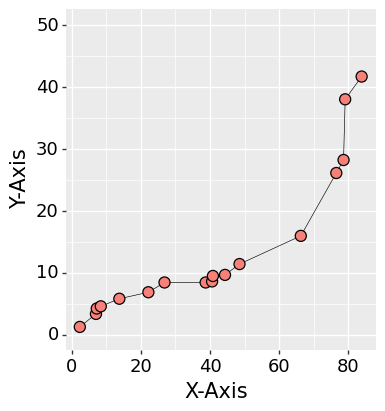

<ggplot: (8752483781453)>


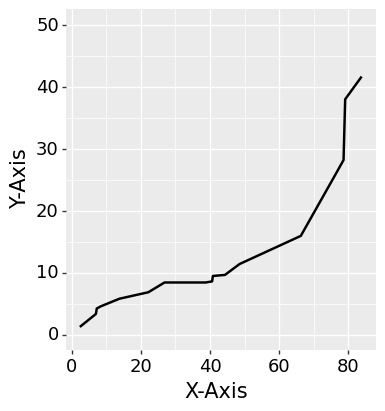

<ggplot: (8752477038605)>


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  2 11:01:25 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotnine import *
from scipy import interpolate

df=pd.read_csv('Line_Data.csv')

#-----------------------------------------(a)-------------------------------------------
Line_plot1=(ggplot(df, aes('x', 'y') )+
  geom_line( size=0.25)+
  geom_point(shape='o',size=4,color="black",fill="#F78179") +
  xlab("X-Axis")+
  ylab("Y-Axis")+
  ylim(0, 50)+
  theme(
       axis_title=element_text(size=15,face="plain",color="black"),
        axis_text = element_text(size=13,face="plain",color="black"),
      legend_position="none",
      aspect_ratio =1.1,
       figure_size = (4, 4),
       dpi = 100
       )
  )
print(Line_plot1)

#-----------------------------------------(b)-------------------------------------------
Line_plot2=(ggplot(df, aes('x', 'y') )+
  geom_line( size=1)+
  #geom_point(shape='o',size=4,color="black",fill="#F78179") +
  xlab("X-Axis")+
  ylab("Y-Axis")+
  ylim(0, 50)+
  theme_gray()+
  theme(
       axis_title=element_text(size=15,face="plain",color="black"),
        axis_text = element_text(size=13,face="plain",color="black"),
      legend_position="none",
      aspect_ratio =1.1,
       figure_size = (4, 4),
       dpi = 100
       )
  )
print(Line_plot2)



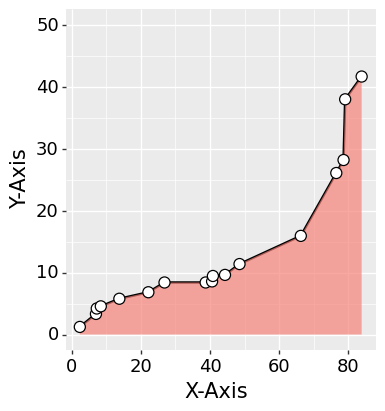

<ggplot: (8752476906297)>


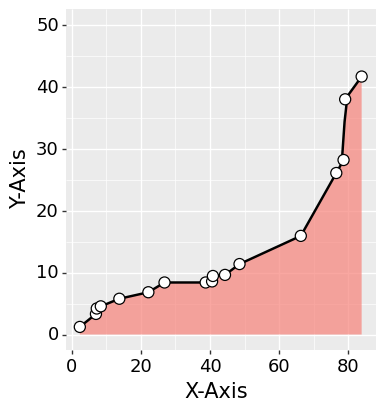

<ggplot: (8752476927553)>


In [ ]:

#-----------------------------------------(c)-------------------------------------------

Line_plot3=(ggplot(df, aes('x', 'y') )+
  geom_line( size=1)+
  geom_area(fill="#F78179",alpha=0.7)+
  geom_point(shape='o',size=4,color="black",fill="w") +
  xlab("X-Axis")+
  ylab("Y-Axis")+
  ylim(0, 50)+
  theme_gray()+
  theme(
       axis_title=element_text(size=15,face="plain",color="black"),
        axis_text = element_text(size=13,face="plain",color="black"),
      legend_position="none",
      aspect_ratio =1.1,
       figure_size = (4, 4),
       dpi = 100
       )
  )
print(Line_plot3)


#-----------------------------------------(d)-------------------------------------------

f = interpolate.interp1d(df['x'], df['y'])#, kind='slinear')#kind='linear', 

x_new=np.linspace(np.min(df['x']),np.max(df['x']),100)
y_new=f(x_new)
df_interpolate = pd.DataFrame({'x': x_new,'y':y_new})

Line_plot2=(ggplot()+
  geom_area(df_interpolate, aes('x', 'y'),size=1,fill="#F78179",alpha=0.7)+
  geom_line(df_interpolate, aes('x', 'y'),size=1)+
  geom_point(df, aes('x', 'y'),shape='o',size=4,color="black",fill="white") +
  xlab("X-Axis")+
  ylab("Y-Axis")+
  ylim(0, 50)+
  theme_gray()+
  theme(
       axis_title=element_text(size=15,face="plain",color="black"),
        axis_text = element_text(size=13,face="plain",color="black"),
      legend_position="none",
      aspect_ratio =1.1,
       figure_size = (4, 4),
       dpi = 100
       )
  )
print(Line_plot2)

# 瀑布图
- 相同的x，不同的y离散型遍历，z数值变量，可以表现不同遍历之间的数据变化关系
- 分为三维和二维，三维能直观比较不同类别的数据差异，但三维会有遮挡
- 二维没遮挡，但不能比较不同类别的数据差异
- 峰峦图比较好
- 时间序列/不同的地点/温度就很合适

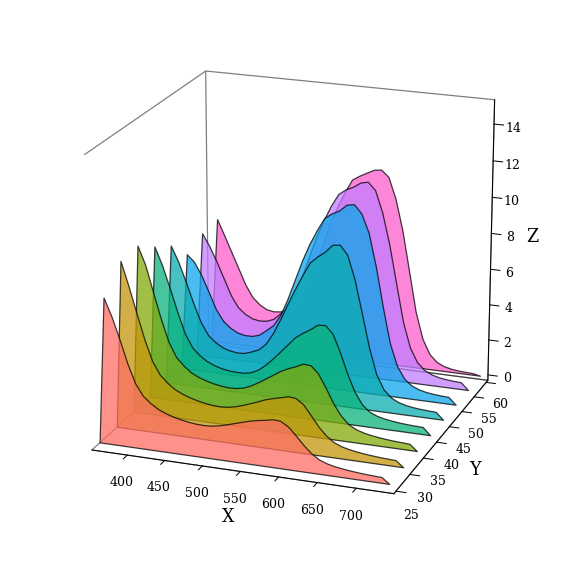

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 30 10:55:50 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
df=pd.read_csv('Facting_Data.csv')

fig = plt.figure(figsize=(8,8),dpi =90)  
ax = fig.gca(projection='3d')
ax.view_init(azim=-70, elev=20)##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.grid(False)
ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
xs = df['X_Axis'].values
verts = []
zs = np.arange(25,65,5)
for z in zs:
    ys =df[str(z)].values
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
pal_husl = sns.husl_palette(len(zs),h=15/360, l=.65, s=1).as_hex() 

poly = PolyCollection(verts, facecolors=pal_husl,edgecolor='k')
poly.set_alpha(0.75)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(360, 740)
ax.set_ylabel('Y')
ax.set_ylim3d(25, 60)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 15)
plt.show()


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]


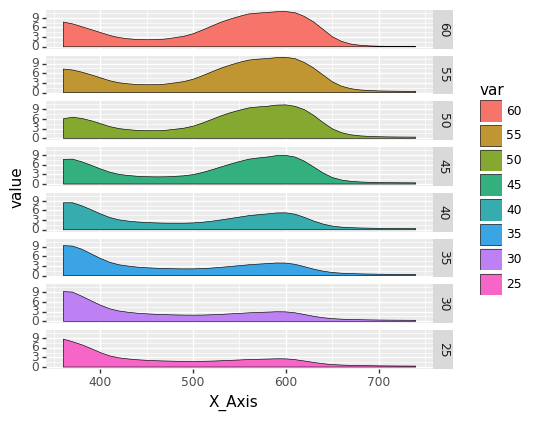

<ggplot: (8752475888785)>


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


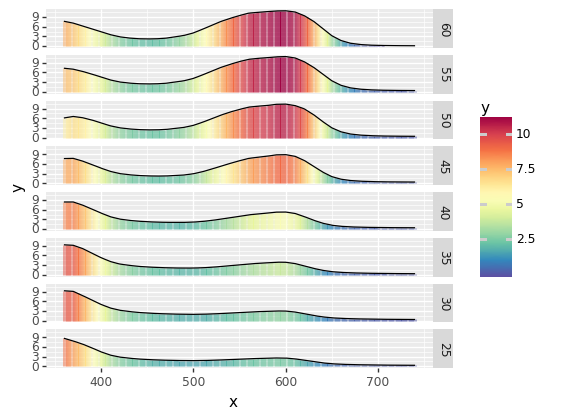

<ggplot: (8752475767745)>


In [25]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  2 11:14:08 2019

@author:Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

df=pd.read_csv('Facting_Data.csv')

#------------------------------------------(a)-----------------------------------------------
df_melt=pd.melt(df,id_vars='X_Axis',var_name='var',value_name='value')
df_melt['var']=df_melt['var'].astype(pd.CategoricalDtype(categories=np.unique(df_melt['var'])[::-1],ordered=True))

base_plot=(ggplot(df_melt,aes('X_Axis','value',fill='var'))+
  geom_area(color="black",size=0.25)+
  facet_grid('var~.')+
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  theme(aspect_ratio =0.1,
       dpi=100,
       figure_size=(5,0.5)))
print(base_plot)


#------------------------------------------(b)--------------------------------
from scipy import interpolate

mydata=pd.DataFrame( columns=['x','y','var'])
        
list_var=np.unique(df_melt['var'])
N=300
for i in list_var:
    x=df.loc[:,'X_Axis']
    y=df.loc[:,i]
    f = interpolate.interp1d(x,y)#, kind='slinear')#kind='linear', 

    x_new=np.linspace(np.min(x),np.max(x),N)
    y_new=f(x_new)
    mydata = mydata.append(pd.DataFrame({'x': x_new,'y':y_new,'var':np.repeat(i,N)}))

mydata['var']=mydata['var'].astype(pd.CategoricalDtype(categories=np.unique(df_melt['var'])[::-1],ordered=True))


                                         
base_plot=(ggplot(mydata,aes('x','y',group='var'))+
  geom_bar(aes(fill='y'),color='none',size=0.5,stat="identity")+
  geom_line(color="black",size=0.5)+
  scale_fill_cmap(name ='Spectral_r')+
  facet_grid('var~.')+
    theme(aspect_ratio =0.1,
       dpi=100,
       figure_size=(5,0.5)))
print(base_plot)



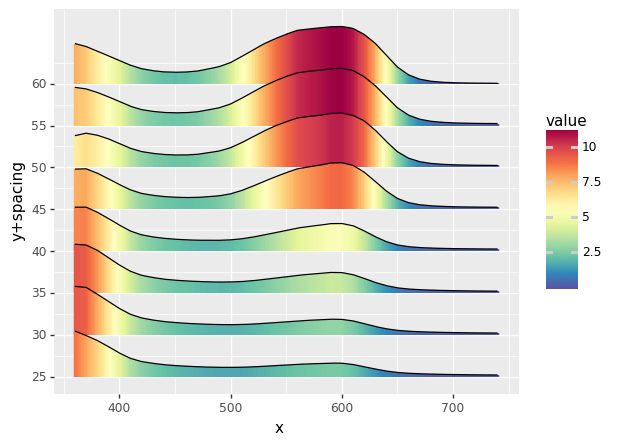

<ggplot: (8752476720005)>


In [22]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  5 09:38:56 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import pandas as pd
import numpy as np
from plotnine import *
from scipy import interpolate
df=pd.read_csv('Facting_Data.csv')
df_melt=pd.melt(df,id_vars='X_Axis',var_name='var',value_name='value')
mydata=pd.DataFrame( columns=['x','y','var'])       
list_var=np.unique(df_melt['var'])
N=300
for i in list_var:
    x=df.loc[:,'X_Axis']
    y=df.loc[:,i]
    f = interpolate.interp1d(x,y)#, kind='slinear')#kind='linear', 
    x_new=np.linspace(np.min(x),np.max(x),N)
    y_new=f(x_new)
    mydata = mydata.append(pd.DataFrame({'x': x_new,'y':y_new,'var':np.repeat(i,N)}))

height=8

mydata['var']=mydata['var'].astype(pd.CategoricalDtype(categories=np.unique(df_melt['var']), ordered=True))
mydata['spacing']=mydata['var'].values.codes*height

labels=np.unique(df_melt['var'])
breaks=np.arange(0,len(labels)*height,height)

base_plot=(ggplot())
for i in np.unique(df_melt['var'])[::-1]:
    mydata_temp=mydata[mydata['var']==i]
    base_plot=(base_plot+
               geom_linerange(mydata_temp,aes(x='x',ymin='spacing',ymax='y+spacing',color='y'),size=1)+
               geom_line(mydata_temp,aes(x='x',y='y+spacing'),color="black",size=0.5))
base_plot=(base_plot+scale_color_cmap(name ='Spectral_r')+
           scale_y_continuous(breaks=breaks,labels=labels)+
           guides(color=guide_colorbar(title='value'))+
           theme(dpi=100,figure_size=(6,5))) 
print(base_plot)


# 热力图
- 反映相关线性关系

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


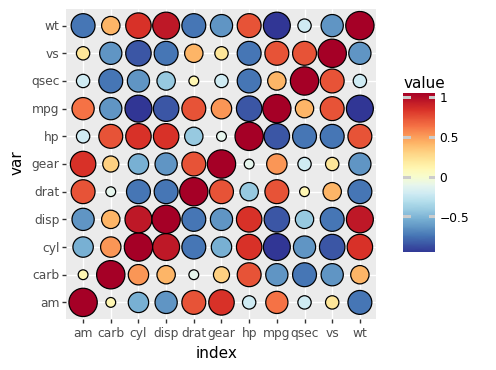

<ggplot: (8752476041593)>


In [29]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 30 10:57:58 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import numpy as np
import pandas as pd
from plotnine import *
from plotnine.data import mtcars
mat_corr=np.round(mtcars.corr(),1).reset_index()
mydata=pd.melt(mat_corr,id_vars='index',var_name='var',value_name='value')
mydata['AbsValue']=np.abs(mydata.value)
#------------------------------------------------(b) 气泡图------------------------------------------
base_plot=(ggplot(mydata, aes(x ='index', y ='var', fill = 'value',size='AbsValue')) +  
  geom_point(shape='o',colour="black") +
  scale_size_area(max_size=11, guide=False) +
  scale_fill_cmap(name ='RdYlBu_r')+
  coord_equal()+
    theme(dpi=100,figure_size=(4,4)))
print(base_plot)



/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


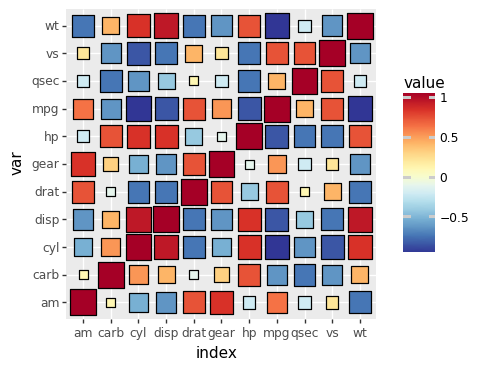

<ggplot: (8752477205681)>


In [27]:
#------------------------------------------------(c) 方块图------------------------------------------------
base_plot=(ggplot(mydata, aes(x ='index', y ='var', fill = 'value',size='AbsValue')) +  
  geom_point(shape='s',colour="black") +
  scale_size_area(max_size=10, guide=False) +
  scale_fill_cmap(name ='RdYlBu_r')+
  coord_equal()+
    theme(dpi=100, figure_size=(4,4)))
print(base_plot)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


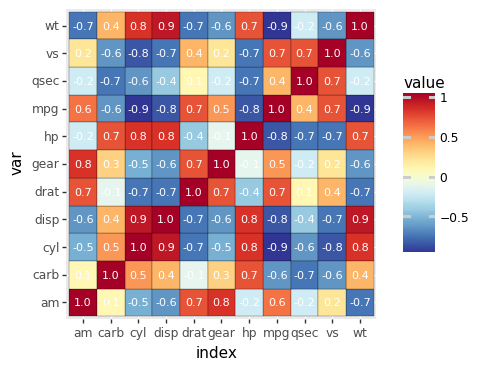

<ggplot: (8752476132457)>


In [28]:
#------------------------------------------------(f) 带标签的热力图-----------------------------------
base_plot=(ggplot(mydata, aes(x ='index', y ='var', fill = 'value',label='value')) +  
  geom_tile(colour="black") +
  geom_text(size=8,colour="white")+
  scale_fill_cmap(name ='RdYlBu_r')+
  coord_equal()+
    theme(dpi=100,figure_size=(4,4)))
print(base_plot)